# Project: Wrangling and Analyze Data

## Data Gathering

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import re
import nltk
%matplotlib inline 

### Loading into pandas DataFrame the three (3) Tweeter Datasets for this project

In [2]:
# Loading WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) directly downloaded
# into df_twitter_archive
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# Using Requests library to download the tweet image prediction (image_predictions.tsv)

# creating a folder to store image paths
folder_name = 'image_path'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# using requests.get to extract the image url    
image_url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open(os.path.join(folder_name, image_url.split('/')[-1]), mode = 'wb') as file:
        response = requests.get(image_url)
        file.write(response.content)
        
# loading the image predictions into df_image_predictions 
df_image_predictions = pd.read_table('image_path/image-predictions.tsv')

#### In gathering the tweet_json.txt file, an alternative approach provided to gather the file was used 

In [4]:
# Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

# creating a list to store the four variables (tweet_id, created_at, favorite_count, retweet_count)
df_list = []

# Opening the tweet_json file data and extracting the four required variables
with open ('tweet-json.txt', 'r') as tweet_data:
    for each_line in tweet_data:
        data = json.loads(each_line)
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']

        # Appending to the list created 
        df_list.append({'tweet_id' : tweet_id,
                        'created_at' : created_at,
                        'favorite_count' : favorite_count,
                        'retweet_count' : retweet_count})

# loading the tweet_json data into df_tweet_json        
df_tweet_json = pd.DataFrame (df_list, columns= ['tweet_id','created_at', 'favorite_count', 'retweet_count'])

## Assessing Data

### Displaying the three (3) datasets to assess it visually 

In [5]:
# displaying the twitter_archive to assess it visually 
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
df_twitter_archive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [7]:
# displaying the image_predictions to assess it visually 
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# displaying the tweet_json to assess it visually 
df_tweet_json

,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48


##  Assessing the three (3) datasets programmatically 

### Assessing twitter_archive table

In [9]:
# displaying the first 5 rows of twitter_archive table
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# displaying the last 5 rows of twitter_archive table
df_twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
# checking 10 randomly rows of twitter_archive table
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2196,668852170888998912,NaN,NaN,2015-11-23 18:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668852170...,11,10,Bobb,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090...,7,10,Gizmo,None,None,None,None
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
772,776477788987613185,NaN,NaN,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,None,None,pupper,None
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399...,13,10,None,None,None,None,None


In [12]:
# checking for more information in twitter_archive table
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# checking for null values in twitter_archive table
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

There are null values in twitter_archive table

In [15]:
# checking for duplicaete rows in twitter_archive table
df_twitter_archive.duplicated().sum()

0

No duplicate row in twitter_archive table

#### working on name column in twitter_archive table 

In [16]:
# names of dog in lower case
df_twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

##### Checking for names of dog in name column where the names of dog is in lower case and compairing it with list stopwords

In [17]:
original_names = df_twitter_archive.name

# Return lowercase characters in name column
names_with_lower_case = [lower_case for lower_case  in original_names if lower_case.islower()]
print(names_with_lower_case)

['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


#### using stowords approach

In [18]:
# downloading stopwords and printing out the english version of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Compairing the list of names with lower case in name column in twitter_archive table and the list of stopwords (from nltk.corpus). It was observed that the following list of names [‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, ‘very’] are not relevant or valid in column name hence the should be removed


Stop words are the words in a stop list (or stoplist or negative dictionary) which are filtered out (i.e. stopped) before or after processing of natural language data (text) because they are insignificant.

In [19]:
# checking for more information where in_reply_to_status_id is null
df_twitter_archive[df_twitter_archive["in_reply_to_status_id"].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

#### observing expanded_urls column in df_twitter_archive table

In [20]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


#### observing rating_numerator and rating_denominator column in df_twitter_archive table

In [21]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [22]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [23]:
df_twitter_archive.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [24]:
# Checking out all ratings found in each tweet in text column
rating_ratios = []
for rating_ratio_index in df_twitter_archive.index.tolist():
    ratio = re.findall(r'\d+/\d+', df_twitter_archive.loc[rating_ratio_index, 'text'])
    rating_ratios.append(ratio)
    
rating_ratios

[['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['5/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['17/10', '13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['12/10'],
 ['11/10'],
 ['13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['14/10'],
 ['11/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['11/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10

The rating columns are found to have wrong rating ratios and some rows having more than one rating ratios. probably containing more than one Dog 

## Assessing image_predictions

In [25]:
# viewing 20 random rows in image_prediction table
df_image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,7.481950e-02,True
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,9.113280e-02,False
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,1.060140e-01,True
1179,738156290900254721,https://pbs.twimg.com/media/Cj51Oj3VAAEVe4O.jpg,1,pug,0.751758,True,tub,0.110748,False,bathtub,1.041320e-01,False
1467,778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,True,boxer,0.201478,True,American_Staffordshire_terrier,1.428380e-01,True
159,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,1,kelpie,0.421979,True,collie,0.227060,True,Cardigan,1.682110e-01,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,3.272680e-02,False
1621,803276597545603072,https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg,1,Pembroke,0.457086,True,chow,0.307801,True,golden_retriever,4.998820e-02,True
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,3.797580e-02,True


In [26]:
# checking for more information in image_prediction table
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# checking for duplicate rows in image_prediction table
df_image_predictions.duplicated().sum()

0

No duplicaete in the image_prediction table

In [28]:
# checking for null values in image_prediction table
df_image_predictions.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

No null value in image_prediction table 

#### Observing  dog prediction column in image_predictions table 

In [29]:
# checking if row prediction p1_dog, p2_dog and p3_dog in image_prediction are False
df_image_predictions.query("p1_dog==False and p2_dog==False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


324 rows in image_prediction table has prediction p1_dog, p2_dog and p3_dog all False. These are not valid for our analysis.

## Assessing tweet_json Table

In [30]:
# displaying the first 5 rows in  tweet_json table
df_tweet_json.head()

,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


In [31]:
# checking for more information in tweet_json table
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   created_at      2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [32]:
# checking for null values in tweet_json table
df_tweet_json.isnull().any()

tweet_id          False
created_at        False
favorite_count    False
retweet_count     False
dtype: bool

In [33]:
# checking for duplicaete rows in tweet_json table
df_tweet_json.duplicated().sum()

0

### Quality issues
1. Timestamp column in twitter_archive table should be changed to datetime. 

2. Names of dog like 'a', 'all', 'an', 'by', 'his', 'just', 'my', 'not', 'such', 'the', 'this', 'very' in names column in twitter_archive table should be removed and set as NaN value 

3. Unavailable Dog names in name column represented as none and empty spaces in dataframe should be changed to NaN to maintain consistency throughout the table.

4. Rows with retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should be removed as they are not needed for our analysis.

5. Rows with in_reply_to_status_id and in_reply_to_user_id should be droped as they are redundant rows and are not needed for our analysis.

6. Tweets rows without expanded_urls i.e no images, should be dropped. keep only original tweets with images.

7. Wrong rating_numerator and rating_denominator

8. Underscores in image prediction(p1, p2 and p3) column should be removed and casing should be in proper form. 

9. Prediction p1_dog, p2_dog and p3_dog all contains false in a row in the image_prediction table which are not valid for our analysis.  

### Tidiness issues
1. doggo, floofer, pupper, and puppo columns in twitter_archive should be replaced with single column (say dog_stage).

2. favorite_count and retweet_count columns in tweet_json amd image_pridictions table should be merged twitter_archive table.

### Issue documentation in few sentences
In this project I have gathered 3 datasets: twitter_archive, image_prediction and tweet_json.
The assessment was done both visually and programmatically.

While assessing the data, I observed that the entire 3 datasets has about 9 quality issues and about 2 tidiness issues.

### Quality issues
#### twitter_archive table has quality issues like:
1. Wrong data type for the timestamp column
2. Wrong entry of names of dog like 'a', 'all', 'an', 'by', 'his', 'just', 'my', 'not', 'such', 'the', 'this', 'very' in names column
3. Unavailable Dog names in name column represented as none.
4. Redundancy with retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. 
5. Redundancy Rows with in_reply_to_status_id and in_reply_to_user_id should be droped as they are redundant rows.
6. Tweets rows without expanded_urls i.e no images in expanded_urls column.
7. Wrong rating_numerator and rating_denominator
#### image_prediction table has quality issues like:
8. validity issue in image prediction(p1, p2 and p3). 
9. prediction p1_dog, p2_dog and p3_dog all contains false in a row in the image_prediction table which are not valid for our analysis.

### Tidiness issues
#### twitter_archive table has tidiness issues like:
1. doggo, floofer, pupper, and puppo columns in twitter_archive should be replaced with single column (say dog_stage).
2. favorite_count and retweet_count columns in tweet_json amd image_pridictions table should be merged twitter_archive table.

# Cleaning Data

In [34]:
# Making a copy of original dataframe of assesed dataframe
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

### Tidiness issues
### Issue #1: 
doggo, floofer, pupper, and puppo columns in twitter_archive should be replaced with single dog_stage column.

#### Define: 
convert ["doggo", "flooter", "pupper", "puppo"] in twitter_archive columns into one 'dog_stage' column, then drop the four columns.

#### Code

In [35]:
#creating a new column 'dog_stage' and assigning concatenated rows in the 4 variables to it 
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo

# replacing the combined none values to empty space 
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['dog_stage'].str.replace("None","")

# seperating the concatenated values in the 4 columns into separate individual values 
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [36]:
# dropping the initial 4 columns 
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

#### Test

In [37]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [38]:
df_twitter_archive_clean[df_twitter_archive_clean['dog_stage']!= '']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,pupper


In [39]:
df_twitter_archive_clean['dog_stage'].value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Issue #2: 
favorite_count and retweet_count columns in tweet_json and image_pridictions table should be merged twitter_archive table.

#### Define
merge "favorite_count" and "retweet_count" in df_tweet_json_clean and image_pridictions_clean with df_twitter_archive_clean on tweet_id

#### Code

In [40]:
# specifying the columns in tweet_json_clean table to merge
df_tweet_json_clean = pd.DataFrame(df_tweet_json_clean, columns=["tweet_id", "favorite_count", "retweet_count"])

# merging the df_twitter_archive_clean with df_tweet_json_clean
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_json_clean, on=['tweet_id'], how='left')

# merging the df_twitter_archive_clean with df_image_predictions_clean
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, on=['tweet_id'], how='left')

#### Test

In [41]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [42]:
list(df_twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [43]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

### Quality issues
### Issue #1: 
Timestamp column in twitter_archive table  should be datetime.

#### Define
change the timestamp column to datetime

#### Code

In [44]:
df_twitter_archive_clean.timestamp = df_twitter_archive_clean.timestamp.astype('datetime64')

#### Test

In [45]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #2:
Wrong entry of names of dog like 'a', 'all', 'an', 'by', 'his', 'just', 'my', 'not', 'such', 'the', 'this', 'very' in names column

#### Define
create a list of names to replace and use for loop to give indvidual name "NaN".

#### Code

In [46]:
# replace the words in names_with_lower_case with None
names_with_lower_case
for word in names_with_lower_case:
    df_twitter_archive_clean['name'].replace(word, np.NaN , inplace = True)

#### Test

In [47]:
print (df_twitter_archive_clean['name'].unique().tolist())

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', nan, 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Lorenzo', 'Carl', 'Jordy', 'Milky', 'Trooper', 'Win

### Issue #3: 
Unavailable Dog names in name column represented as none and empty spaces in dataframe should be changed to NaN to maintain consistency throughout the table.

#### Define
Replace the None values in the dataframe and the empty spaces in dataframe to NaN values using replace

#### Code

In [48]:
# Replacing the None values with NaN 
df_twitter_archive_clean.replace('None', np.NaN, inplace = True)

# empty space found in dog_stage should be replaced with NaN values
df_twitter_archive_clean['dog_stage'].replace('', np.NaN, inplace = True)

#### Test

In [49]:
df_twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
237,847157206088847362,NaN,NaN,2017-03-29 18:43:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's been pup for adoption for mo...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/37334596,h...",...,2.0,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131...,...,1.0,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,...,2.0,Pembroke,0.773135,True,Cardigan,0.116810,True,chow,0.039036,True
1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743609206...,...,3.0,Weimaraner,0.982794,True,American_Staffordshire_terrier,0.004766,True,Great_Dane,0.003432,True
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,...,1.0,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
1104,735137028879360001,NaN,NaN,2016-05-24 15:55:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735137028...,...,1.0,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True
1374,701952816642965504,NaN,NaN,2016-02-23 02:12:47,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701952816...,...,1.0,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
1281,708810915978854401,NaN,NaN,2016-03-13 00:24:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He's a wonderful father to his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708810915...,...,2.0,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,...,1.0,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True
1082,738883359779196928,NaN,NaN,2016-06-04 00:01:35,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738883359...,...,2.0,Labrador_retriever,0.691137,True,golden_retriever,0.195558,True,Chesapeake_Bay_retriever,0.019585,True


### Issue #4: 
Rows with retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp should be removed as they are not needed for our analysis.

#### Define
Find the index of retweets, then remove retweets rows and and drop 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns

#### Code

In [50]:
# Using only 'retweeted_status_id' since all the rows that has retweet in 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns has same index with 'retweeted_status_id'

retweeted_rows_index = list(df_twitter_archive_clean[df_twitter_archive_clean["retweeted_status_id"].isnull()==False].index)

# Dropping the rows
df_twitter_archive_clean = df_twitter_archive_clean.drop(axis=0, index = retweeted_rows_index)

#Dropping the columns 
df_twitter_archive_clean = df_twitter_archive_clean.drop(['retweeted_status_id',
                                                          'retweeted_status_user_id',
                                                          'retweeted_status_timestamp'], axis=1)

#### Test

In [51]:
for retweet in retweeted_rows_index:
    if retweet in list(df_twitter_archive_clean.index):
        print('Found a retweet')

In [52]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #5: 
Rows with in_reply_to_status_id and in_reply_to_user_id should be droped as they are redundant rows

#### Define
Find and remove the index rows of reply tweets 'in_reply_to_user_id' and 'in_reply_to_status_id' and drop the two columns.

#### Code

In [53]:
# Using only "in_reply_to_status_id" since all the rows that has replied tweet in 
# 'in_reply_to_user_id' and 'in_reply_to_status_id' columns has same index with "in_reply_to_status_id"

replied_index_rows = list(df_twitter_archive_clean[df_twitter_archive_clean["in_reply_to_status_id"].isnull()==False].index)

# Dropping replied_index_rows
df_twitter_archive_clean = df_twitter_archive_clean.drop(axis=0, index = replied_index_rows)

# Dropping 'in_reply_to_user_id' and 'in_reply_to_status_id' columns 
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_user_id', 
                                                          'in_reply_to_status_id'], axis=1)

#### Test

In [54]:
for reply in replied_index_rows:
    if reply in list(df_twitter_archive_clean.index):
        print('Found a reply')

In [55]:
df_twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1942,673711475735838725,2015-12-07 03:51:47,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,https://twitter.com/dog_rates/status/673711475...,10,10,NaN,NaN,1114.0,...,1.0,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True
635,793601777308463104,2016-11-01 23:53:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Dobby. I can't stop looking at her fee...,https://twitter.com/dog_rates/status/793601777...,12,10,Dobby,NaN,8926.0,...,1.0,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
1179,719367763014393856,2016-04-11 03:33:34,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sid &amp; Murphy. Murphy floats alongside...,https://twitter.com/dog_rates/status/719367763...,11,10,Sid,NaN,3022.0,...,1.0,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
1480,693486665285931008,2016-01-30 17:31:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He doesn't understand his new...,https://twitter.com/dog_rates/status/693486665...,11,10,Lincoln,NaN,1941.0,...,1.0,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
172,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,16304.0,...,1.0,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
903,758405701903519748,2016-07-27 20:56:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He falls asleep wherever he want...,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,NaN,5756.0,...,4.0,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1372,702217446468493312,2016-02-23 19:44:20,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",https://twitter.com/dog_rates/status/702217446...,9,10,NaN,NaN,5268.0,...,1.0,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
1255,710609963652087808,2016-03-17 23:33:12,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I've watched this a million times and you prob...,https://vine.co/v/idaTpwH5TgU,12,10,NaN,NaN,5227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,689835978131935233,2016-01-20 15:44:48,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,NaN,2369.0,...,1.0,collie,0.600186,True,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True
86,875747767867523072,2017-06-16 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,NaN,25773.0,...,1.0,Labrador_retriever,0.799551,True,Chesapeake_Bay_retriever,0.179975,True,vizsla,0.004618,True


In [56]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                1390 non-null   object        
 8   dog_stage           336 non-null    object        
 9   favorite_count      2097 non-null   float64       
 10  retweet_count       2097 non-null   float64       
 11  jpg_url             1971 non-null   object        
 12  img_num             1971 non-null   float64       
 13  p1                  1971 non-null   object      

### Issue #6: 
Tweets rows without expanded_urls i.e no images should be dropped, keep only original tweets with images.

#### Define 
look for row index without expanded_url and drop them

Note: row index without expanded_url has been reduced to 3 rows as result of the cleaning processes that have be done on the dataframe earlier.

In [57]:
# Saving the row index without expanded_urls in rows_without_expanded_urls
rows_without_expanded_urls = list(df_twitter_archive_clean[df_twitter_archive_clean['expanded_urls'].isnull()].index)

# Dropping replied_index_rows
df_twitter_archive_clean = df_twitter_archive_clean.drop(axis=0, index = rows_without_expanded_urls)

#### Test

In [58]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2094 non-null   int64         
 1   timestamp           2094 non-null   datetime64[ns]
 2   source              2094 non-null   object        
 3   text                2094 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2094 non-null   int64         
 6   rating_denominator  2094 non-null   int64         
 7   name                1390 non-null   object        
 8   dog_stage           335 non-null    object        
 9   favorite_count      2094 non-null   float64       
 10  retweet_count       2094 non-null   float64       
 11  jpg_url             1971 non-null   object        
 12  img_num             1971 non-null   float64       
 13  p1                  1971 non-null   object      

### Issue #7: 
Wrong rating_numerator and rating_denominator .

#### Define 
create a variable where we are going to save the entire ratios extracted from text column in the twitter_archive column. 

Then remove the ratios with more than one rating ratio and then include the single rating ratios in the cleaned twitter_archive dataframe

#### Code

In [59]:
#Creating a list where to save  rating ratios extracted in text column
rating_ratios = []

#looping through to extract each rating ratio
for rating_ratio_index in df_twitter_archive_clean.index.tolist():
    ratio = re.findall(r'\d+/\d+', df_twitter_archive_clean.loc[rating_ratio_index, 'text'])
    
    # Appending extracted rating ratios in created list
    rating_ratios.append(ratio)

In [60]:
# displaying the rating ratios 
rating_ratios

[['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['5/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['14/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['12/10'],
 ['11/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['11/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['14/10'],
 ['13/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['14/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['13/10'],
 ['12/10'],
 ['12/10'],
 ['13/10'],
 ['12/10'],
 ['13

In [61]:
# checking for the total number of rating ratios extracted
len(rating_ratios)

2094

In [62]:
# Creating a new column in twitter_archive dataFrame and assigning it to list of ratios extracted
df_twitter_archive_clean['rating'] = rating_ratios

In [63]:
# Creating a list for rating ratios more than one 
indexes_other_than_1_ratio = []

# looping through to extract the rating ratios other than one
for index_ratio in df_twitter_archive_clean.index.tolist():
    if len(df_twitter_archive_clean.loc[index_ratio, 'rating']) > 1:
        
        # Appending extracted rating ratios other than one in created list
        indexes_other_than_1_ratio.append(index_ratio)

In [64]:
# displaying the rating ratios other than one 
df_twitter_archive_clean.loc[indexes_other_than_1_ratio, 
                          ['text', 'rating_numerator', 'rating_denominator','rating']]

,text,rating_numerator,rating_denominator,rating
766,"""Yep... just as I suspected. You're not flossi...",12,10,"[12/10, 11/10]"
1007,This is Bookstore and Seaweed. Bookstore is ti...,10,10,"[10/10, 7/10]"
1068,"After so many requests, this is Bretagne. She ...",9,11,"[9/11, 14/10]"
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20,"[4/20, 13/10]"
1202,This is Bluebert. He just saw that both #Final...,50,50,"[50/50, 11/10]"
1222,Meet Travis and Flurp. Travis is pretty chill ...,10,10,"[10/10, 8/10]"
1359,This is Socks. That water pup w the super legs...,9,10,"[9/10, 2/10]"
1459,This may be the greatest video I've ever been ...,4,10,"[4/10, 13/10]"
1465,Meet Oliviér. He takes killer selfies. Has a d...,10,10,"[10/10, 5/10]"
1508,When bae says they can't go out but you see th...,5,10,"[5/10, 10/10]"


In [65]:
len(indexes_other_than_1_ratio)

27

In [66]:
# Taking only the rows that has only one rating ratios 
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.index.isin(indexes_other_than_1_ratio)== False]

In [67]:
# dropping the 'rating' column in the twitter_archive table
df_twitter_archive_clean = df_twitter_archive_clean.drop('rating', axis=1)

#### Test

In [68]:
df_twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,111.0,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,311.0,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,128.0,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,132.0,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [69]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2067 non-null   int64         
 1   timestamp           2067 non-null   datetime64[ns]
 2   source              2067 non-null   object        
 3   text                2067 non-null   object        
 4   expanded_urls       2067 non-null   object        
 5   rating_numerator    2067 non-null   int64         
 6   rating_denominator  2067 non-null   int64         
 7   name                1375 non-null   object        
 8   dog_stage           333 non-null    object        
 9   favorite_count      2067 non-null   float64       
 10  retweet_count       2067 non-null   float64       
 11  jpg_url             1944 non-null   object        
 12  img_num             1944 non-null   float64       
 13  p1                  1944 non-null   object      

### Issue #8: 
prediction p1_dog, p2_dog and p3_dog all contains false in a row in the image_prediction table which are not valid for our analysis.

#### Define
find rows that have three false and drop them.

#### Code

In [70]:
false_3 = list(df_image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
df_image_predictions_clean= df_image_predictions_clean.drop(index=false_3)

#### Test

In [71]:
df_image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index

Int64Index([], dtype='int64')

In [72]:
df_image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [73]:
df_image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

### Quality issues
### Issue #9: 
underscores in image prediction(p1, p2 and p3) column should be removed and casing should be in proper form.

#### Define 
Remove underscores and change image descriptions to proper case 

In [74]:
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.replace('_', ' ')
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.replace('_', ' ')
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.replace('_', ' ')

df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.title()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.title()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.title()

#### Test

In [75]:
df_image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


## Storing Data

In [76]:
# storing the gathered, assessed, and cleaned twitter_archive datasets to a csv file format
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

# Analyzing and Visualizing Data

In [77]:
# reading the master dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [78]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2067 non-null   int64  
 1   timestamp           2067 non-null   object 
 2   source              2067 non-null   object 
 3   text                2067 non-null   object 
 4   expanded_urls       2067 non-null   object 
 5   rating_numerator    2067 non-null   int64  
 6   rating_denominator  2067 non-null   int64  
 7   name                1375 non-null   object 
 8   dog_stage           333 non-null    object 
 9   favorite_count      2067 non-null   float64
 10  retweet_count       2067 non-null   float64
 11  jpg_url             1944 non-null   object 
 12  img_num             1944 non-null   float64
 13  p1                  1944 non-null   object 
 14  p1_conf             1944 non-null   float64
 15  p1_dog              1944 non-null   object 
 16  p2    

##### Analyzing of Dogs with top favourite count  with their corresponding tweet_id

In [79]:
# using groupby to group tweet_id, name and with favorite_count
dog_with_fav_count = df_master.groupby(['tweet_id', 'name'])['favorite_count'].max()

# sorting the dogs favorite_count in descending order and using head() to grap the first 10
dog_with_fav_count_sort = dog_with_fav_count.sort_values(ascending = False).head(10)
dog_with_fav_count_sort

tweet_id            name   
879415818425184262  Duddles    107956.0
807106840509214720  Stephan    107015.0
866450705531457537  Jamesy     106827.0
819004803107983360  Bo          95450.0
870374049280663552  Zoey        85011.0
830583320585068544  Lilly       73397.0
877736472329191424  Aja         71144.0
887473957103951883  Canela      69871.0
884925521741709313  Earl        68152.0
676219687039057920  Kenneth     67100.0
Name: favorite_count, dtype: float64

The display above shows the top 10 Dogs with highest favorite_count along side with their names and tweet_id.

The above analysis shows that 3 dog with name **Duddles**, **Stephan** and **Jamesy** with tweet_id **879415818425184262**, **807106840509214720** and **866450705531457537** respectively has a really close favorite_count.

* Duddles has the highest favorite_count of **107956.0** 
* Stephan has favorite_count of **107015.0** 
* Jamesy has favorite_count of **106827.0** 

But based on my analysis, **Duddles** with tweet_id **879415818425184262** has the highest favorite_count of **107956.0** 

##### Analyzing Dog stages with top favourite count  and retweet_count  

In [80]:
dog_stage_max = df_master.groupby('dog_stage').max()
dog_stage_max = dog_stage_max[['favorite_count', 'retweet_count']]
dog_stage_max

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10960\1011497759.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dog_stage_max = df_master.groupby('dog_stage').max()


,favorite_count,retweet_count
dog_stage,,
doggo,131075.0,79515.0
"doggo, floofer",17169.0,3433.0
"doggo, pupper",44619.0,17621.0
"doggo, puppo",47844.0,19196.0
floofer,33345.0,18497.0
pupper,106827.0,32883.0
puppo,132810.0,48265.0


The display above shows the maximum favorite_count and retweet_count of dog stages.

Analysis shows that dog stage with name **doggo** and **puppo** has a really close favorite_count but huge difference in retweet_count.

doggo has the highest favorite_count of **131075.0** and retweet_count **79515.0**

puppo has favorite_count of **132810.0** and retweet_count **48265.0**

##### Analyzing Year with the highest favorite count and the Dog who has the win

In [81]:
df_master['timestamp'].value_counts()

2017-08-01 16:23:56    1
2016-01-09 19:31:20    1
2016-01-05 01:44:52    1
2016-01-05 02:09:54    1
2016-01-05 02:30:55    1
                      ..
2016-08-01 02:45:22    1
2016-08-01 19:07:17    1
2016-08-01 23:15:56    1
2016-08-02 01:44:48    1
2015-11-15 22:32:08    1
Name: timestamp, Length: 2067, dtype: int64

In [82]:
# getting year of highest favorite_count with ther corresponding dog name
year_with_hihest_fav = df_master.groupby(['timestamp', 'name'])['favorite_count'].max()
year_with_hihest_fav = year_with_hihest_fav.sort_values(ascending = False).head(1)
year_with_hihest_fav

timestamp            name   
2017-06-26 19:07:24  Duddles    107956.0
Name: favorite_count, dtype: float64

The display above shows the top year of highest favorite_count with ther corresponding dog name.

The above analysis shows that the year 2017 has highest favorite_count of **107956.0** Dog with name **Duddles**

# Insights:
1. Dogs with highest favourite count

2. Dog stage with highest favourite count and retweet count 

3. Year with the highest favorite count and the Dog who has the win

# Visualization

### 1. Top 10 Dogs with highest favourite count

#### Representing the first insigth with visuals 

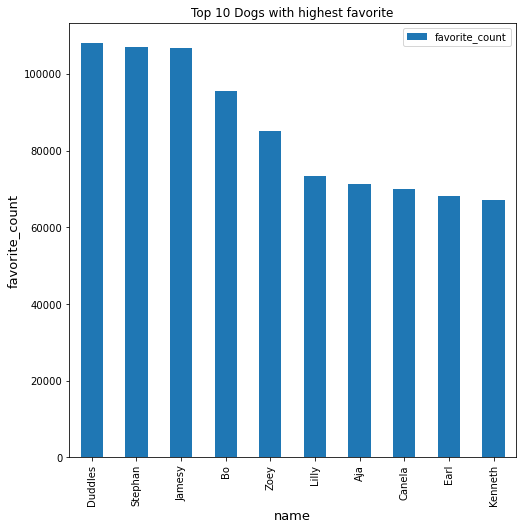

In [83]:
# using groupby to group name and with favorite_count
dog_with_fav_count = df_master.groupby(['name'])['favorite_count'].max()

# sorting the dogs favorite_count in descending order and using head() to grap the first 10
dog_with_fav_count_sort = dog_with_fav_count.sort_values(ascending = False).head(10)

# plotting a bar chart representation 
dog_with_fav_count_sort.plot(kind = 'bar', legend = 'favorite_count', figsize = (8,8))

plt.title('Top 10 Dogs with highest favorite')
plt.xlabel('name', fontsize=13)
plt.ylabel('favorite_count', fontsize=13)
plt.show();

The display above shows the top 10 Dogs with highest favorite_count along side with their names and tweet_id.

The above analysis shows that Dog with name **Duddles**, tweet_id  879415818425184262 has the highest favorite_count of 107956.0

### 2. Dog_stage with highest favourite_count and retweet_count

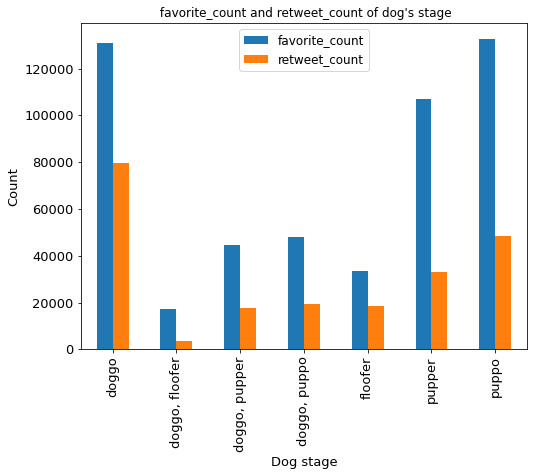

In [84]:
# categorizing the variables to plot
dog_stage_max_viz = dog_stage_max[['favorite_count', 'retweet_count']].plot(kind='bar', title =" favorite_count and retweet_count of dog's stage",
                   figsize=(8,6), legend=True, fontsize=13)

# setting up the labels and the font size 
dog_stage_max_viz.set_xlabel("Dog stage", fontsize=13)
dog_stage_max_viz.set_ylabel("Count", fontsize=13)

plt.legend(fontsize = 12)

plt.show()

The display above shows the maximum favorite_count and retweet_count of dog stages.

Analysis shows that dog stage with name **doggo** and **puppo** has a really close favorite_count but huge difference in retweet_count.

doggo has the highest favorite_count of **131075.0** and retweet_count **79515.0**

puppo has favorite_count of **132810.0** and retweet_count **48265.0**

### 3. Year with the highest favorite count and the Dog who had the win

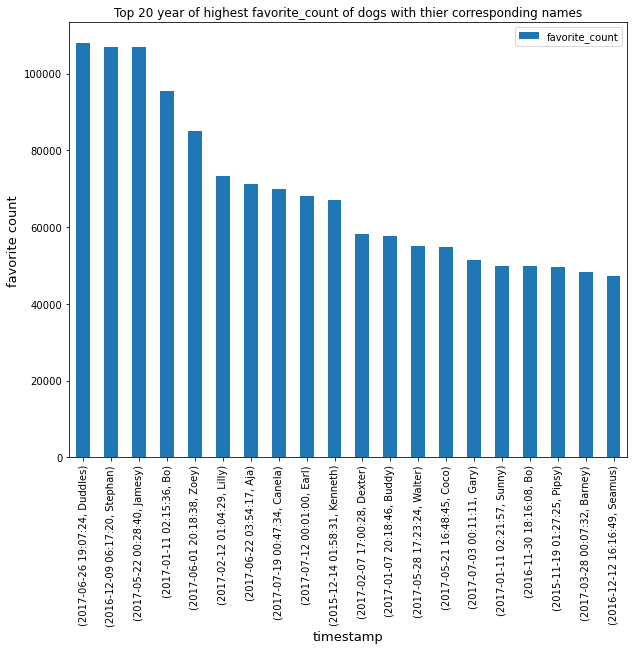

In [85]:
top_20_fav_highest_year = df_master.groupby(['timestamp', 'name'])['favorite_count'].max()
top_20_fav_highest_year = top_20_fav_highest_year.sort_values(ascending = False).head(20)
top_20_fav_highest_year.plot(kind = 'bar', figsize = (10,8), legend = 'favorite_count')

plt.title('Top 20 year of highest favorite_count of dogs with thier corresponding names')
plt.xlabel('timestamp', fontsize=13)
plt.ylabel('favorite count', fontsize=13)
plt.show();

The display above shows 20 top year of highest favorite_count with ther corresponding dog name.

### Data used for my analysis and visualization

**twitter_archive_master.csv**